In [111]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [98]:
# Load Dataset
def wrangle (datafile):    

    names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

    # Load Dataset to Pandas
    df = pd.read_csv(datafile, names=names) 
    
    # Drop the Id Column 
    df.drop(columns=['id','bare_nuclei', 'mitoses'], inplace=True)
    df.replace('?',-99999, inplace=True)

    
    return df
    

In [99]:
df = wrangle("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

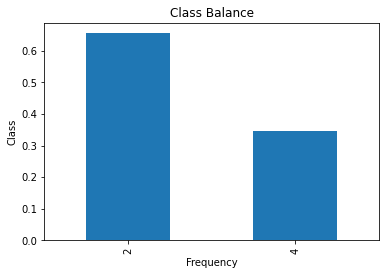

In [88]:
# Plot class balance
df["class"].value_counts(normalize=True).plot(
    kind="bar"
)
plt.xlabel("Frequency")
plt.ylabel("Class")
plt.title("Class Balance");

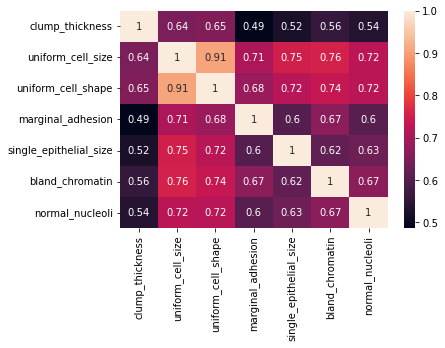

In [104]:
# Correlation Heat Map
corr = df.drop(columns="class").corr()

sns.heatmap(corr, annot=True);



In [101]:
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


In [105]:
target = "class"

X = df.drop(columns=[target])
y = df[target]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:

# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC(gamma=0.1, kernel="rbf", probability=True)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
  
    kfold = KFold(n_splits=10)   
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.958799 (0.021393)
SVM: 0.957013 (0.023033)


KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       1.00      0.97      0.98        91
           4       0.94      1.00      0.97        49

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

KNN
KNeighborsClassifier()


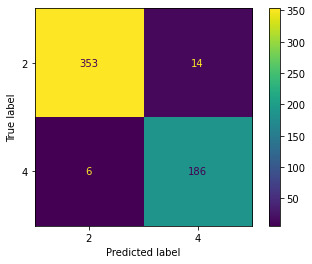

SVM
0.9785714285714285
              precision    recall  f1-score   support

           2       1.00      0.97      0.98        91
           4       0.94      1.00      0.97        49

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM
SVC(gamma=0.1, probability=True)


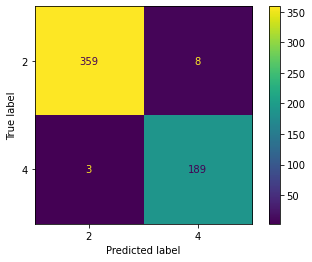

In [117]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
    print(name)
    print(model)
    cm = confusion_matrix(y_train, model.predict(X_train))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 

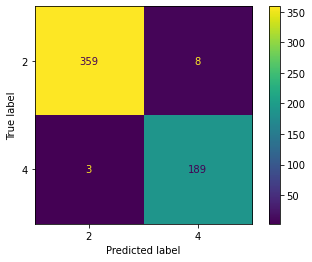

In [112]:
cm = confusion_matrix(y_train, model.predict(X_train))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [113]:
print(model)

SVC(gamma=0.1, probability=True)
